# First assignment: Compute different measures on a realistic graph

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import collections


## Try synthetic graph

In [2]:
n = 50 # number of nodes
p = 0.07 # propability 

G = nx.erdos_renyi_graph(n, p)

# number of nodes
print("Number of nodes: ", nx.number_of_nodes(G))

# number of links
print("Number of edges: ", nx.number_of_edges(G))


Number of nodes:  50
Number of edges:  77


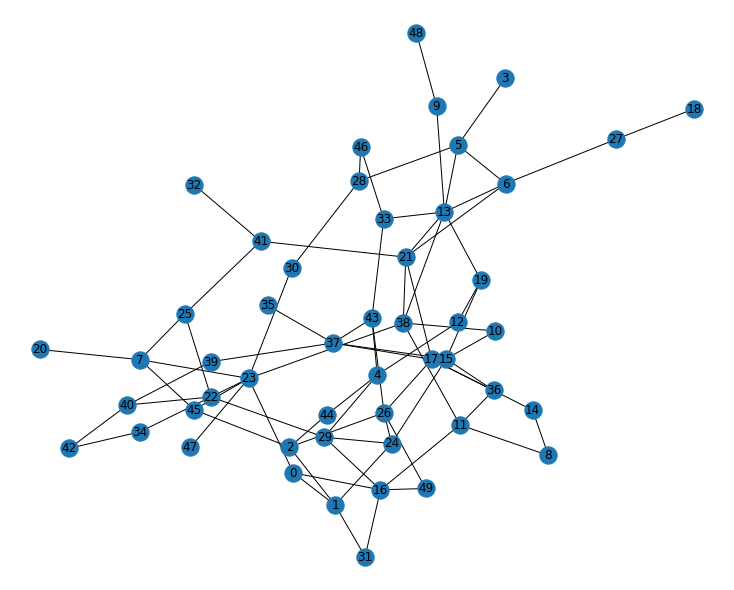

In [3]:
# draw
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True)
plt.show()

# poi con quello reale bisogna usare Gephi

### Compute metrics

#### Find the largest connected component if necessary

In [4]:
if not nx.is_connected(G):
    print("graph not connected! From now on the largest component will be considered as the graph")  
    G =  G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]).copy()
    
print("Number of nodes of the giant component: ", nx.number_of_nodes(G))


# o bisogna considerare tutte le componenti in qualche modo? da chiedere

Number of nodes of the giant component:  50


#### 1.Does the graph have the same characteristics of a random or a power-law network?

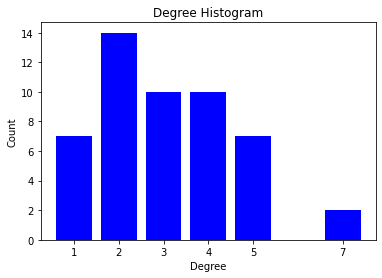

In [5]:

# Degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

# la distribuzione dovrebbe darci un'idea ma credo vadano pure usate le ultime formule che ha spiegato (quelle con gamma per intenderci) 

#### 2. Which are the most important nodes, with respect to a given centrality measure?

In [6]:
# da scegliere le misure

k= 10 # top k node

betwenness = nx.betweenness_centrality(G)

# select first k
betwenness = dict(sorted(betwenness.items(), key=lambda item: item[1], reverse=True)[:k])

print(betwenness)

closeness = nx.closeness_centrality(G)

# select first k
closeness = dict(sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:k])

print(closeness)

print("Average clustering: ", nx.average_clustering(G))



{13: 0.22587058632976992, 23: 0.220092322643343, 38: 0.19270124716553289, 21: 0.16702299967606082, 17: 0.1260102850664075, 37: 0.1002712989957888, 6: 0.09163832199546483, 26: 0.08659499514091348, 11: 0.0780612244897959, 43: 0.07400186264982182}
{38: 0.3858267716535433, 21: 0.37404580152671757, 13: 0.3684210526315789, 23: 0.3602941176470588, 17: 0.35, 26: 0.3402777777777778, 11: 0.3356164383561644, 15: 0.3356164383561644, 43: 0.32666666666666666, 19: 0.32450331125827814}
Average clustering:  0.02980952380952381


#### 3. Are the paths short with respect to the size of the network?


In [7]:
print("Diameter: ", nx.diameter(G))
print("Average distance ", nx.average_shortest_path_length(G))


Diameter:  7
Average distance  3.493061224489796


#### 4. Is the network dense?


In [8]:
# da fare più avanti nel corso

#### 5. Is the network assortative?

In [9]:
# da fare più avanti nel corso